# 🧩 Notebook 01: Descriptive Statistics and Initial EDA with SciPy

In [1]:
# Setup and Imports
import pandas as pd
import numpy as np
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.viz_utils import (
    apply_theme,
    plot_histograms,
    plot_boxplots,
    plot_pairplot,
    plot_correlation_heatmap,
    plot_ecdf,
    save_and_show_plot
)
from utils.stats_tests_utils import (
    compute_skewness_kurtosis,
    summarize_descriptive_statistics
)

apply_theme()

# Constants
DATA_PATH = Path("../synthetic_data/exports")
EXPORT_PLOTS = Path("../exports/plots/01_descriptive_stats")
EXPORT_TABLES = Path("../exports/tables/01_descriptive_stats")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 🔹 Step 1: Load Dataset

In [2]:
# Loading dataset
df = pd.read_csv(DATA_PATH / "normal_skewed.csv")
df.head()

,normal,skewed
0,54.967142,79.878419
1,48.617357,73.584971
2,56.476885,59.707286
3,65.230299,70.115542
4,47.658466,67.595047


## 🔹 Step 2: Summary Table

In [3]:
# Summary table
summary_stats = summarize_descriptive_statistics(df, ['normal', 'skewed'])
summary_stats.to_csv(EXPORT_TABLES / "summary_statistics.csv")
summary_stats

,Mean,Median,Std Dev,Min,Max,Variance,Std Error
normal,50.193321,50.253006,9.792159,17.587327,88.527315,95.886385,0.309655
skewed,71.814693,69.748587,9.204097,56.885894,108.656447,84.715408,0.291059


## 🔹 Step 3: Skewness & Kurtosis

In [4]:
# Skewness & Kurtosis
shape_stats = compute_skewness_kurtosis(df, ['normal', 'skewed'])
pd.DataFrame(shape_stats).T

,skewness,kurtosis
normal,0.116801,0.066206
skewed,0.967944,0.727682


## 🔹 Step 4: Histograms

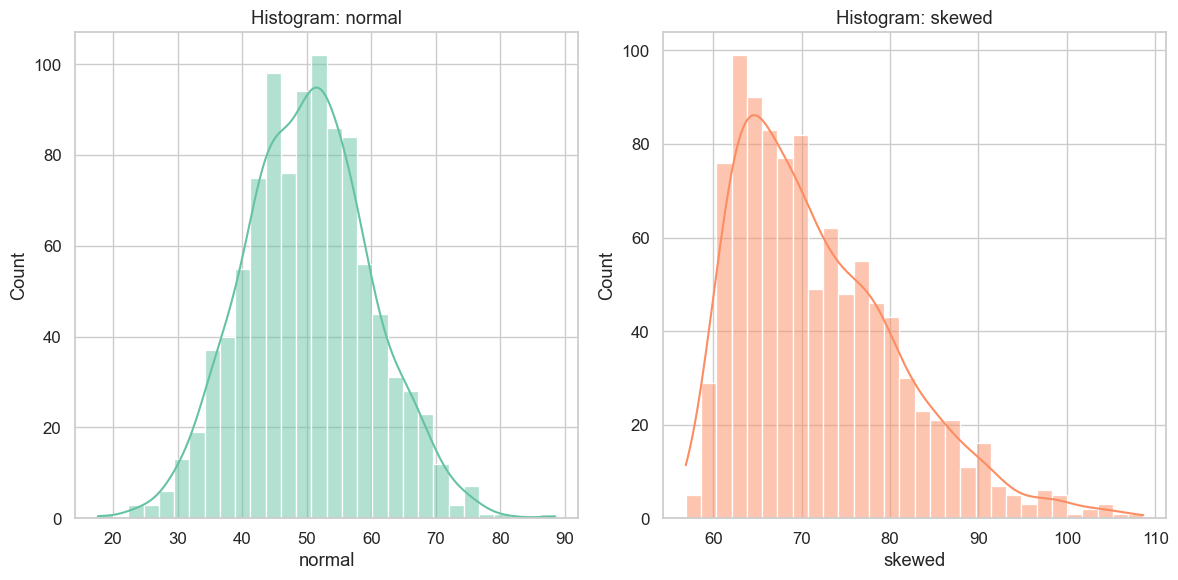

In [5]:
# Histograms
fig = plot_histograms(df, ['normal', 'skewed'])
save_and_show_plot(fig, EXPORT_PLOTS / "histograms.png")

## 🔹 Step 5: Boxplots

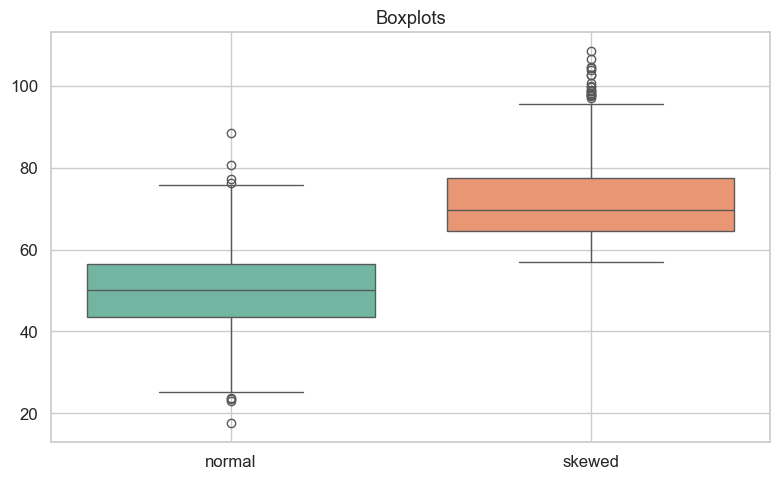

In [6]:
# Boxplots
fig = plot_boxplots(df, ['normal', 'skewed'])
save_and_show_plot(fig, EXPORT_PLOTS / "boxplots.png")

## 🔹 Step 6: ECDF Plot (Normal)

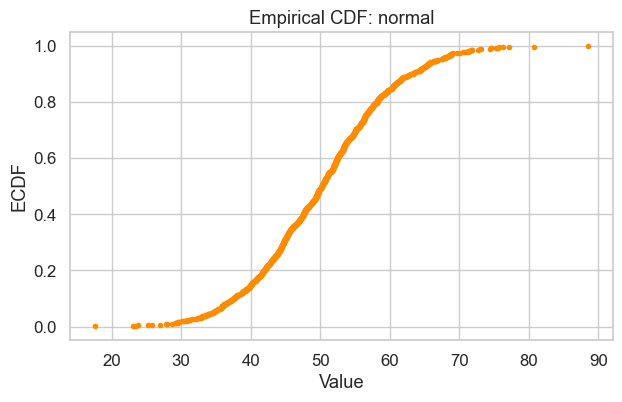

In [7]:
# ECDF Plot (Normal)
fig = plot_ecdf(df, 'normal')
save_and_show_plot(fig, EXPORT_PLOTS / "ecdf_normal.png")

## 🔹 Step 7: ECDF Plot (Skewed)

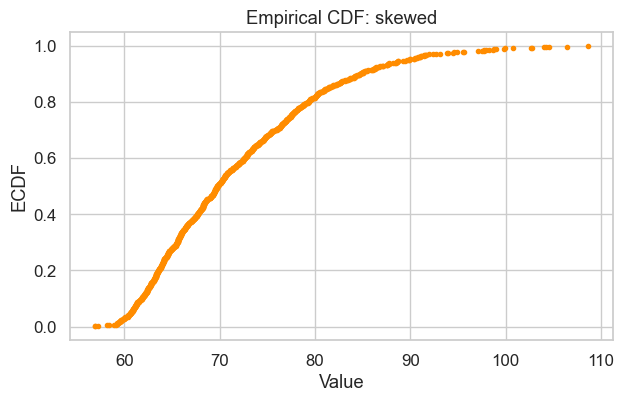

In [8]:
# ECDF Plot (Skewed)
fig = plot_ecdf(df, 'skewed')
save_and_show_plot(fig, EXPORT_PLOTS / "ecdf_skewed.png")

## 🔹 Step 8: Pairplot & Correlation Heatmap

/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/

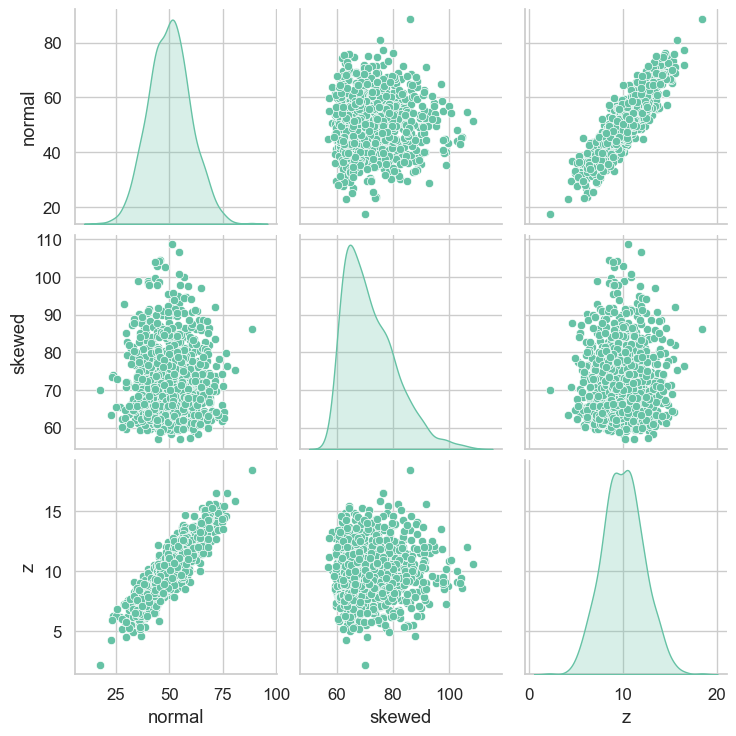

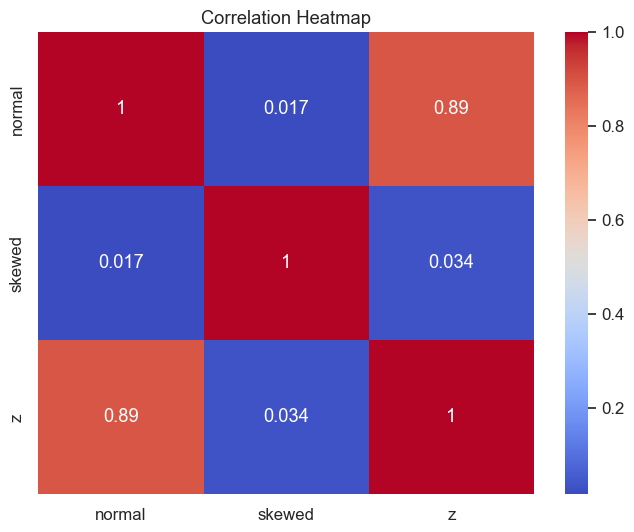

In [9]:
# Add a dummy correlation context — may not make sense unless multivariate
df_multi = df.copy()
df_multi["z"] = df_multi["normal"] * 0.2 + np.random.normal(0, 1, len(df_multi))

pairplot_fig = plot_pairplot(df_multi)
pairplot_fig.savefig(EXPORT_PLOTS / "pairplot.png")

heatmap_fig = plot_correlation_heatmap(df_multi)
save_and_show_plot(heatmap_fig, EXPORT_PLOTS / "correlation_heatmap.png")


## 🧠 Key Takeaways
- `scipy.stats.describe()` offers a concise summary but deeper stats can be computed via `.agg()` and utility wrappers
- ECDF plots offer richer insights into distribution shape compared to histograms
- Skewness and kurtosis help detect asymmetry and tailedness in numeric data
- Pairplots + heatmaps reveal relationships, even if weak, between simulated variables

## ✅ Summary
In this notebook, we:

- Loaded and explored synthetic normal + skewed data
- Generated summary tables and saved them to exports/tables/
- Computed skewness, kurtosis, and standard deviations
- Created multiple visualizations (histograms, boxplots, ECDF, pairplots)
- Exported all plots to exports/plots/01_descriptive_stats/